# 0.0. IMPORTS

In [73]:
import numpy as np
import pandas as pd
import plotly.express as px
import scipy.stats as ss
import seaborn as sns

from IPython.display       import Image
from IPython.core.display  import HTML
from matplotlib            import pyplot as plt

## 0.1. Helper Functions

In [50]:
# supress scientific notation
np.set_printoptions(suppress=True)
pd.set_option("display.float_format", '{:.2f}'.format)

# graph options
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [51]:
# loading data into memory
data_raw = pd.read_csv('datasets/kc_house_data.csv')

# 1.0. STEP 01 - DATA DESCRIPTION

In [52]:
df1 = data_raw.copy()

## 1.1. Rename Columns

In [53]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Assuming that the description of the above features are as follows:

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

Source: https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

## 1.2. Data Dimensions

In [54]:
print( 'The dataset has {} rows and {} columns.'.format( df1.shape[0], df1.shape[1] ) )

The dataset has 21613 rows and 21 columns.


## 1.3. Data Types

In [55]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [56]:
# converting data from object do datetime
df1['date'] = pd.to_datetime( df1['date'], format='%Y-%m-%d' )

In [57]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.4. Check NA

In [58]:
# show the sum of empty rows 
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.5. Descriptive Statistics

## 1.5.1 Numerical Attributes

In [59]:
num_attributes = df1.select_dtypes( include=['int64','float64'] )

In [60]:
num_attributes.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [78]:
# central tendency
mean = pd.DataFrame( num_attributes.apply( np.mean ) ).T
median = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion
std = pd.DataFrame( num_attributes.apply( np.std )).T
min_ = pd.DataFrame( num_attributes.apply( min )).T
max_ = pd.DataFrame( num_attributes.apply( max )).T
range_ = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() )).T
skew = pd.DataFrame( num_attributes.apply( lambda x: x.skew() )).T
kurtosis = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() )).T

m = pd.concat( [min_,max_,range_,mean,median,std,skew,kurtosis] ).T.reset_index()

# rename columns
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
3,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
4,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
5,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
6,floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
7,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.39,127.63
8,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
9,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53


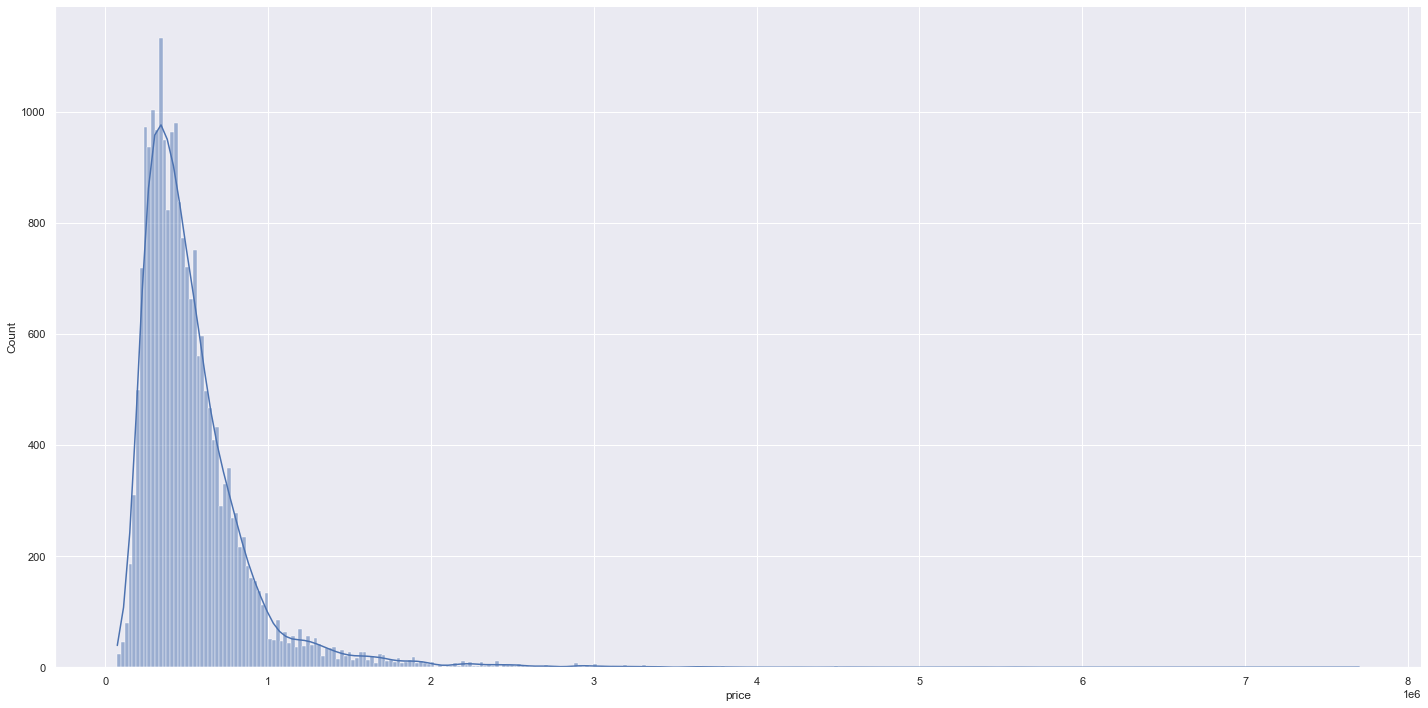

In [68]:
sns.displot( df1['price'], kde=True, height=10, aspect=2 )
# aspect: Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

# 2.0. STEP 02 - FEATURE ENGINEERING

In [83]:
df2 = df1.copy()

## 2.1. Hypothesis List

H1: Imóveis que possuem vista para água, são 30% mais caros, na média.

H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

H3: Imóveis com porão possuem sqrt_lot 50% maiores do que sem porão.


H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%

H5: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ) de 15%.

H6: Imóveis com condição acima do índice 3 (inclusive) são 30% mais caros, em média, do que imóveis de condições 1 e 2.

H7: Imóveis com alta qualidade de construção e design possuem preços 20% mais caros, em média. 

H8: Imóveis reformados nos últimos 5 anos são 30% mais caros, em média.

H9: Mais de 50% dos imóveis com vista para a água possuem mais de 1 andar.

H10: Quanto maior a metragem do terreno, maior o preço do imóvel. 

## 2.4. Feature Engineering

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. (Criar uma variável para cada nível de construção e design)

# 3.0. STEP 03 - VARIABLES FILTERING

## 3.1. Rows Filtering

## 3.1. Rows Filtering

# 4.0. STEP 04 - EXPLORATORY DATA ANALYSIS

## 4.1. Univariate Analysis

### 4.1.1 Response Variable

### 4.1.2 Numerical Variables

### 4.1.3 Categorical Variables

## 4.2. Bivariate Analysis

### H.1 

### H.2